In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

In [54]:
# Define the path to the Excel file

file_path = r"D:\Data Analyst Studies\Projects\Churn Analysis\Telecom\Prediction_data.xlsx"

 

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [55]:
# Display the first few rows of the fetched data
print(data.head())

  customer_id  gender  age married            state  number_of_referrals  \
0   11340-JAM  Female   21      No  Jammu & Kashmir                    8   
1   11348-MAH  Female   46      No      Maharashtra                   11   
2   11359-AND  Female   28     Yes   Andhra Pradesh                    3   
3   11370-TAM  Female   21      No       Tamil Nadu                   15   
4   11392-JAM  Female   39     Yes  Jammu & Kashmir                   11   

   tenure_in_months Value_deal phone_service Multiple_lines  ...  \
0                 7        NaN           Yes             No  ...   
1                19     Deal 3           Yes             No  ...   
2                 6     Deal 4           Yes             No  ...   
3                10     Deal 4           Yes             No  ...   
4                 1     Deal 2           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0  Bank Withdrawal      19.950001    219.500000           0.0   
1  B

In [56]:
# Drop columns that won't be used for prediction
data = data.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'gender', 'married', 'state', 'Value_deal', 'phone_service', 'Multiple_lines',

    'internet_service', 'Internet_type', 'Online_security', 'Online_backup',

    'Device_protection_plan', 'Premium_support', 'Streaming_tv', 'Streaming_movies',

    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',

    'payment_method'

]

In [57]:
# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

In [58]:
# Manually encode the target variable 'Customer_Status'

data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('customer_status', axis=1)

y = data['customer_status']


In [59]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [61]:
# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[809  61]
 [104 228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       870
           1       0.79      0.69      0.73       332

    accuracy                           0.86      1202
   macro avg       0.84      0.81      0.82      1202
weighted avg       0.86      0.86      0.86      1202



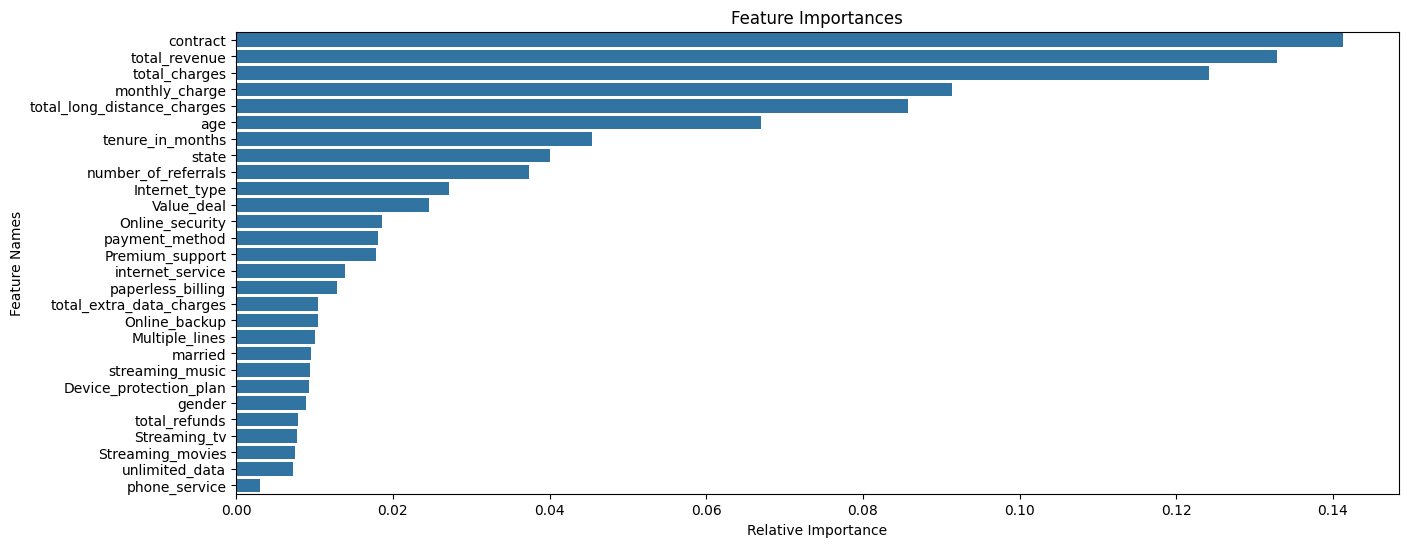

In [62]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [63]:
# Define the path to the Joiner Data Excel file
file_path = r"d:\Data Analyst Studies\Projects\Churn Analysis\Telecom\Prediction_data.xlsx"

# Define the sheet name to read data from

sheet_name = 'vw_JoinedData'

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [64]:
# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['customer_id']

  customer_id  gender  age married          state  number_of_referrals  \
0   14567-TAM    Male   43      No     Tamil Nadu                    1   
1   15803-UTT  Female   34      No  Uttar Pradesh                    6   
2   18415-KAR  Female   33     Yes      Karnataka                    7   
3   21165-DEL  Female   38      No          Delhi                    2   
4   21247-ASS    Male   58     Yes          Assam                    2   

   tenure_in_months Value_deal phone_service Multiple_lines  ...  \
0                 9        NaN           Yes             No  ...   
1                31        NaN           Yes             No  ...   
2                36        NaN           Yes             No  ...   
3                32     Deal 5           Yes             No  ...   
4                 2        NaN           Yes             No  ...   

  payment_method monthly_charge total_charges total_refunds  \
0    Credit Card      20.350000     20.350000           0.0   
1    Credit Card    

In [65]:
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

In [66]:
# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

In [67]:
# Save the results

original_data.to_csv(r"D:\Data Analyst Studies\Projects\Churn Analysis\Telecom.csv", index=False)